In [1]:
%%javascript
require.config({ 
    paths: { 
    d3: 'https://d3js.org/d3.v7.min'
}});

require(["d3"], function(d3) {
    window.d3 = d3;
});

<IPython.core.display.Javascript object>

In [53]:
import sparg
import tskit
import msprime
import numpy as np
import tskit_arg_visualizer as viz
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("always")

In [10]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(time=1, flags=0)  # Node 4
node_table.add_row(time=2, flags=0)  # Node 5
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 6
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 7
node_table.add_row(time=4, flags=0)  # Node 8
node_table.add_row(time=5, flags=0)  # Node 9

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=4, child=0)
edge_table.add_row(left=0, right=1e3, parent=4, child=1)
edge_table.add_row(left=0, right=1e3, parent=5, child=2)
edge_table.add_row(left=0, right=1e3, parent=5, child=4)
edge_table.add_row(left=0, right=500, parent=6, child=3)
edge_table.add_row(left=500, right=1e3, parent=7, child=3)
edge_table.add_row(left=0, right=1e3, parent=8, child=5)
edge_table.add_row(left=0, right=500, parent=8, child=6)
edge_table.add_row(left=500, right=1e3, parent=9, child=7)
edge_table.add_row(left=500, right=1e3, parent=9, child=8)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3]}

viz.D3ARG(ts=ts).draw(edge_type="ortho")

In [11]:
sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations)

(array([[0.554954954954955]], dtype=object),
 array([[5., 4., 3., 1., 0.],
        [4., 5., 3., 1., 0.],
        [3., 3., 5., 1., 0.],
        [1., 1., 1., 5., 3.],
        [0., 0., 0., 3., 5.]]),
 [[0, 4, 5, 8, 9], [1, 4, 5, 8, 9], [2, 5, 8, 9], [3, 6, 8, 9], [3, 7, 9]])

In [46]:
ts_chopped_4 = ts.decapitate(4)
viz.D3ARG(ts=ts_chopped_4).draw()

/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


In [47]:
sparg.estimate_spatial_parameters(ts=ts_chopped_4, locations_of_individuals=node_locations)

(array([[0.822916666666667]], dtype=object),
 array([[4., 3., 2., 0., 0.],
        [3., 4., 2., 0., 0.],
        [2., 2., 4., 0., 0.],
        [0., 0., 0., 4., 3.],
        [0., 0., 0., 3., 4.]]),
 [[0, 4, 5, 8], [1, 4, 5, 8], [2, 5, 8], [3, 6, 8], [3, 7, 10]])

In [33]:
ts_subset_4 = ts.subset(nodes=list(range(8+1)))
viz.D3ARG(ts=ts_subset_4).draw()

In [44]:
sparg.estimate_spatial_parameters(ts=ts_subset_4, locations_of_individuals=node_locations)

(array([[0.822916666666667]], dtype=object),
 array([[4., 3., 2., 0., 0.],
        [3., 4., 2., 0., 0.],
        [2., 2., 4., 0., 0.],
        [0., 0., 0., 4., 3.],
        [0., 0., 0., 3., 3.]]),
 [[0, 4, 5, 8], [1, 4, 5, 8], [2, 5, 8], [3, 6, 8], [3, 7]])

In [40]:
ts_chopped_3 = ts.decapitate(3)
viz.D3ARG(ts=ts_chopped_3).draw()

/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


In [41]:
sparg.estimate_spatial_parameters(ts=ts_chopped_3, locations_of_individuals=node_locations)

/Users/jameskitchens/Documents/GitHub/sparg2.0/sparg/main.py:203: UserWarning: Multiple solutions to system of linear equations in root location calculation.
  warnings.warn("Multiple solutions to system of linear equations in root location calculation.")


(array([[1.95499738356881]], dtype=object),
 array([[3., 2., 1., 0., 0.],
        [2., 3., 1., 0., 0.],
        [1., 1., 3., 0., 0.],
        [0., 0., 0., 3., 3.],
        [0., 0., 0., 3., 3.]]),
 [[0, 4, 5, 10], [1, 4, 5, 10], [2, 5, 10], [3, 6], [3, 7]])

In [42]:
ts_subset_3 = ts.subset(nodes=list(range(7+1)))
viz.D3ARG(ts=ts_subset_3).draw()

/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


In [43]:
sparg.estimate_spatial_parameters(ts=ts_subset_3, locations_of_individuals=node_locations)

/Users/jameskitchens/Documents/GitHub/sparg2.0/sparg/main.py:203: UserWarning: Multiple solutions to system of linear equations in root location calculation.
  warnings.warn("Multiple solutions to system of linear equations in root location calculation.")


(array([[1.14285714285714]], dtype=object),
 array([[2., 1., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 2., 0., 0.],
        [0., 0., 0., 3., 3.],
        [0., 0., 0., 3., 3.]]),
 [[0, 4, 5], [1, 4, 5], [2, 5], [3, 6], [3, 7]])

In [50]:
ts_subset_3_filtered, maps = sparg.remove_useless_nodes(ts=ts_subset_3)
viz.D3ARG(ts=ts_subset_3_filtered).draw()

/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/__init__.py:37: ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/visualizer.js' mode='r' encoding='UTF-8'>
  main_text_template = Template(open(os.path.dirname(__file__) + "/visualizer.js", "r").read())
/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/__init__.py:40: ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/anaconda3/envs/sparg_dev/lib/python3.10/site-packages/tskit_arg_visualizer/visualizer.css' mode='r' encoding='UTF-8'>
  styles = open(os.path.dirname(__file__) + "/visualizer.css", "r").read()


In [51]:
sparg.estimate_spatial_parameters(ts=ts_subset_3_filtered, locations_of_individuals=node_locations)

(array([[0.571428571428571]], dtype=object),
 array([[2., 1., 0.],
        [1., 2., 0.],
        [0., 0., 2.]]),
 [[0, 3, 4], [1, 3, 4], [2, 4]])

In [65]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=4)  # Node 4
node_table.add_row(time=1, flags=0)  # Node 5
node_table.add_row(time=2, flags=0)  # Node 6
node_table.add_row(time=3, flags=0)  # Node 7
node_table.add_row(time=4, flags=msprime.NODE_IS_RE_EVENT)  # Node 8
node_table.add_row(time=4, flags=msprime.NODE_IS_RE_EVENT)  # Node 9
node_table.add_row(time=5, flags=0)  # Node 10
node_table.add_row(time=6, flags=0)  # Node 11

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=5, child=0)
edge_table.add_row(left=0, right=1e3, parent=5, child=1)
edge_table.add_row(left=0, right=1e3, parent=6, child=3)
edge_table.add_row(left=0, right=1e3, parent=6, child=4)
edge_table.add_row(left=0, right=1e3, parent=7, child=2)
edge_table.add_row(left=0, right=1e3, parent=7, child=5)
edge_table.add_row(left=0, right=500, parent=8, child=6)
edge_table.add_row(left=500, right=1e3, parent=9, child=6)
edge_table.add_row(left=0, right=1e3, parent=10, child=7)
edge_table.add_row(left=0, right=500, parent=10, child=8)
edge_table.add_row(left=500, right=1e3, parent=11, child=9)
edge_table.add_row(left=0, right=1e3, parent=11, child=10)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3], 4:[4]}

viz.D3ARG(ts=ts).draw(edge_type="ortho")

In [66]:
ts_subset_3 = ts.subset(nodes=list(range(7+1)))
viz.D3ARG(ts=ts_subset_3).draw()

In [67]:
sparg.estimate_spatial_parameters(ts=ts_subset_3, locations_of_individuals=node_locations)

(array([[0.386363636363636]], dtype=object),
 array([[3., 2., 0., 0., 0.],
        [2., 3., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 0., 0., 2.]]),
 [[0, 5, 7], [1, 5, 7], [2, 7], [3, 6], [4, 6]])

In [73]:
ts_subset_4 = ts.subset(nodes=list(range(9+1)))
viz.D3ARG(ts=ts_subset_4).draw()

In [69]:
sparg.estimate_spatial_parameters(ts=ts_subset_4, locations_of_individuals=node_locations)

(array([[0.579545454545455]], dtype=object),
 array([[3., 2., 0., 0., 0., 0., 0.],
        [2., 3., 0., 0., 0., 0., 0.],
        [0., 0., 3., 0., 0., 0., 0.],
        [0., 0., 0., 4., 2., 4., 2.],
        [0., 0., 0., 2., 4., 2., 4.],
        [0., 0., 0., 4., 2., 4., 2.],
        [0., 0., 0., 2., 4., 2., 4.]]),
 [[0, 5, 7], [1, 5, 7], [2, 7], [3, 6, 8], [4, 6, 8], [3, 6, 9], [4, 6, 9]])

In [70]:
dispersal_rate, cov_mat, paths, locations, variances = sparg.estimate_spatial_parameters(ts=ts_subset_4, locations_of_individuals=node_locations, return_ancestral_node_positions=[0,1,2,3,4,5,6,7,8,9])

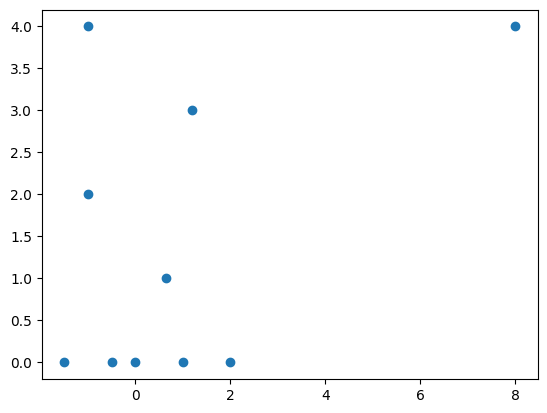

In [71]:
times = []
locs = []
for node in locations:
    times.append(ts.node(node).time)
    locs.append(locations[node])
plt.scatter(locs, times)
plt.show()

In [32]:
ts_left_tree = ts.subset(nodes=[0,1,2,5,7])
viz.D3ARG(ts=ts_left_tree).draw()

In [33]:
sparg.estimate_spatial_parameters(ts=ts_left_tree, locations_of_individuals=node_locations)

(array([[0.454545454545454]], dtype=object),
 array([[3., 2., 0.],
        [2., 3., 0.],
        [0., 0., 3.]]),
 [[0, 3, 4], [1, 3, 4], [2, 4]])

In [34]:
ts_right_tree = ts.subset(nodes=[3,4,6])
viz.D3ARG(ts=ts_right_tree).draw()

In [35]:
sparg.estimate_spatial_parameters(ts=ts_right_tree, locations_of_individuals=node_locations)

(array([[0.250000000000000]], dtype=object),
 array([[2., 0.],
        [0., 2.]]),
 [[0, 2], [1, 2]])

In [47]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(time=1, flags=0)  # Node 2
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 3
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 4

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=2, child=0)
edge_table.add_row(left=0, right=1e3, parent=2, child=1)
edge_table.add_row(left=0, right=500, parent=3, child=2)
edge_table.add_row(left=500, right=1e3, parent=4, child=2)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1]}

viz.D3ARG(ts=ts).draw()

In [43]:
sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations)

(array([[zoo]], dtype=object),
 array([[2., 1., 2., 1.],
        [1., 2., 1., 2.],
        [2., 1., 2., 1.],
        [1., 2., 1., 2.]]),
 [[0, 2, 3], [1, 2, 3], [0, 2, 4], [1, 2, 4]])

In [45]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(time=1, flags=0)  # Node 2
node_table.add_row(time=2, flags=0)  # Node 3

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=2, child=0)
edge_table.add_row(left=0, right=1e3, parent=2, child=1)
edge_table.add_row(left=0, right=1e3, parent=3, child=2)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1]}

viz.D3ARG(ts=ts).draw()

In [46]:
sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations)

(array([[0.500000000000000]], dtype=object),
 array([[2., 1.],
        [1., 2.]]),
 [[0, 2, 3], [1, 2, 3]])

In [49]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=4)  # Node 4
node_table.add_row(time=1, flags=0)  # Node 5
node_table.add_row(time=2, flags=0)  # Node 6
node_table.add_row(time=3, flags=0)  # Node 7
node_table.add_row(time=4, flags=0)  # Node 8

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=5, child=0)
edge_table.add_row(left=0, right=1e3, parent=5, child=1)
edge_table.add_row(left=0, right=1e3, parent=6, child=3)
edge_table.add_row(left=0, right=1e3, parent=6, child=4)
edge_table.add_row(left=0, right=1e3, parent=7, child=2)
edge_table.add_row(left=0, right=1e3, parent=7, child=5)
edge_table.add_row(left=0, right=1e3, parent=8, child=6)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3], 4:[4]}

viz.D3ARG(ts=ts).draw()

In [50]:
sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations)

(array([[0.386363636363636]], dtype=object),
 array([[3., 2., 0., 0., 0.],
        [2., 3., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 4., 2.],
        [0., 0., 0., 2., 4.]]),
 [[0, 5, 7], [1, 5, 7], [2, 7], [3, 6, 8], [4, 6, 8]])

In [52]:
dispersal_rate, cov_mat, paths, locations, varainces = sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations, return_ancestral_node_positions=[0,1,2,3,4,5,6,7,8])

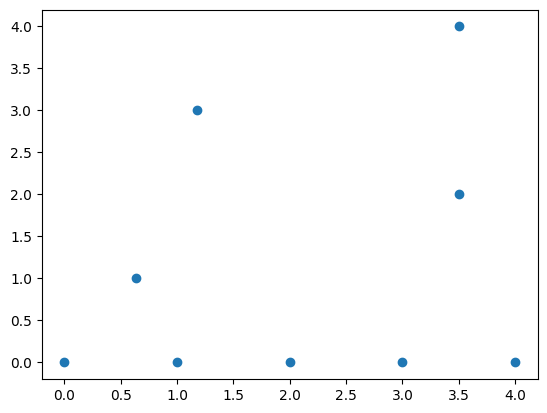

In [58]:
times = []
locs = []
for node in locations:
    times.append(ts.node(node).time)
    locs.append(locations[node])
plt.scatter(locs, times)
plt.show()